## Ambiguity under nonlinear approximations

Wouter Kouw, last update: 12-02-2023


In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/syndr/Wouter/Onderzoek/Projecten/tue/efe-planning/FRAI2023-nlamb`


In [33]:
using Optim
using ForwardDiff
using ProgressMeter
using LinearAlgebra
using Distributions
using Plots
default(label="", grid=false, linewidth=3, markersize=3, margin=10Plots.pt)
include("../util.jl")

ET2 (generic function with 2 methods)

## Sinusoid

In [27]:
# Grid over state space
N = 500
states = range(0, stop=2π, length=N)

# Observation noise
R = 1e-2

0.01

In [34]:
# Observation function
g(z) = sin(z)

# Derivatives
J(z) = ForwardDiff.derivative(g, z)
H(z) = ForwardDiff.derivative(J, z)

# Curvature
κ(z) = abs(H(z))/(1+ J(z)^2)^(3/2)

κ (generic function with 1 method)

In [41]:
ambUT = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mU, SU, CU = UT(m_t, S_t, g, addmatrix=R, β=1.0)

    # Calculate ambiguity
    ambUT[i] = log(max(1e-8,SU-CU'*inv(S_t)*CU))
    
end

In [42]:
ambET1 = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mE, SE, CE = ET1(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambET1[i] = log(max(1e-8,SE-CE'*inv(S_t)*CE))
    
end

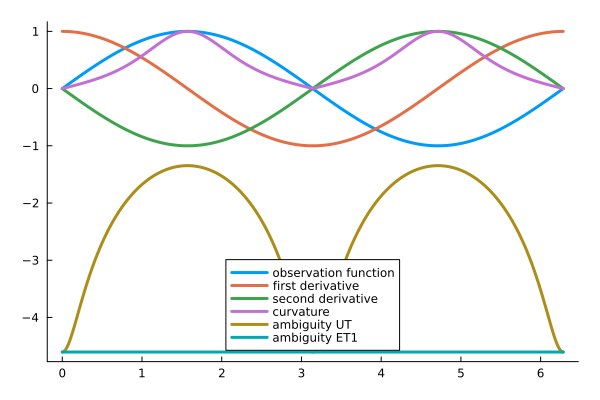

In [43]:
plot(states, g.(states), label="observation function")
plot!(states, J.(states), label="first derivative")
plot!(states, H.(states), label="second derivative")
plot!(states, κ.(states), label="curvature")
plot!(states, ambUT, label="ambiguity UT", legend=:bottom)
plot!(states, ambET1, label="ambiguity ET1", legend=:bottom)

In [44]:
ambET2 = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mE, SE, CE = ET2(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambET2[i] = log(max(1e-8,SE-CE'*inv(S_t)*CE))
    
end

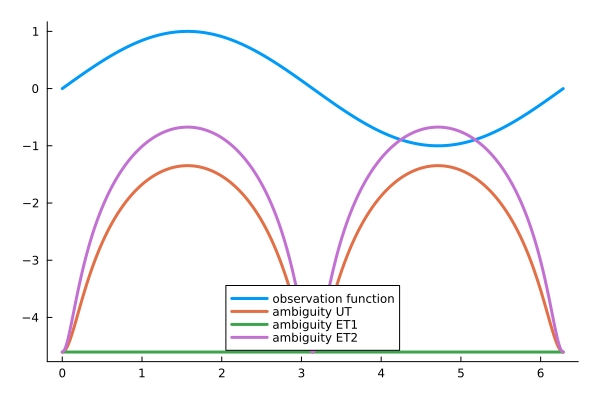

In [45]:
plot(states, g.(states), label="observation function")
plot!(states, ambUT,  label="ambiguity UT",  legend=:bottom)
plot!(states, ambET1, label="ambiguity ET1", legend=:bottom)
plot!(states, ambET2, label="ambiguity ET2", legend=:bottom)

## Distance function

In [53]:
# Observation function
g(z) = (z-1)^3

# Derivatives
J(z) = ForwardDiff.derivative(g, z)
H(z) = ForwardDiff.derivative(J, z)

# Curvature
κ(z) = abs(H(z))/(1+ J(z)^2)^(3/2)

κ (generic function with 1 method)

In [64]:
ambUT = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mU, SU, CU = UT(m_t, S_t, g, addmatrix=R, β=1.0, κ=1.0)

    # Calculate ambiguity
    ambUT[i] = log(max(1e-8,SU-CU'*inv(S_t)*CU))
    
end

In [65]:
ambET1 = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mE, SE, CE = ET1(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambET1[i] = log(max(1e-8,SE-CE'*inv(S_t)*CE))
    
end

In [66]:
ambET2 = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mE, SE, CE = ET2(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambET2[i] = log(max(1e-8,SE-CE'*inv(S_t)*CE))
    
end

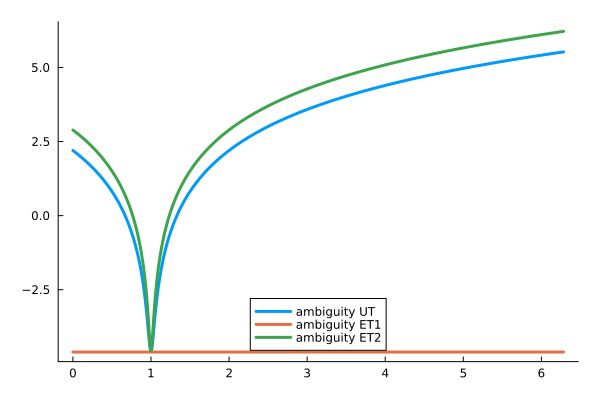

In [67]:
# plot(states, g.(states), label="observation function")
# plot!(states, J.(states), label="first derivative")
# plot!(states, H.(states), label="second derivative")
# plot!(states, κ.(states), label="curvature")
plot(states, ambUT, label="ambiguity UT", legend=:bottom)
plot!(states, ambET1, label="ambiguity ET1", legend=:bottom)
plot!(states, ambET2, label="ambiguity ET2", legend=:bottom)